In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Data**

In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4600,1741-WTPON,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,115.85,6567.9,No
4794,0366-NQSHS,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.35,46.35,No
6414,3472-QPRCH,Male,0,Yes,Yes,40,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.25,1006.9,No
718,1853-ARAAQ,Female,0,No,No,26,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),50.35,1277.5,No
1989,9885-MFVSU,Female,0,Yes,Yes,35,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),46.35,1662.05,No
2827,1845-ZLLIG,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.15,50.15,No
2255,9537-VHDTA,Female,0,No,Yes,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,51.20,51.2,No
4593,9256-JTBNZ,Female,0,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.30,246.3,No
3820,9481-IEBZY,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),112.90,8061.5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# **Total Columns Names**

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
number_rows = df.shape[0]
number_columns = df.shape[1]

# **Number of rows**

In [8]:
print(f'number of rows: {number_rows}')

number of rows: 7043


# **Number of columns**

In [9]:
print(f'number of columns: {number_columns}')

number of columns: 21


# **DataTypes for the Columns**

In [10]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# **Converting TotalCharges Column to Numeric**

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# **Number of numerical and Categorical Columns**

In [13]:
num_numerical = df.select_dtypes(include=['int64', 'float64']).shape[1]
num_categorical = df.select_dtypes(include=['object', 'category']).shape[1]
print(f'number of numerical columns in the dataset: {num_numerical}')
print(f'number of categorical columns in the dataset: {num_categorical}')

number of numerical columns in the dataset: 4
number of categorical columns in the dataset: 17


In [14]:
labels = ['Numerical','Categorical']
counts = [num_numerical,num_categorical]

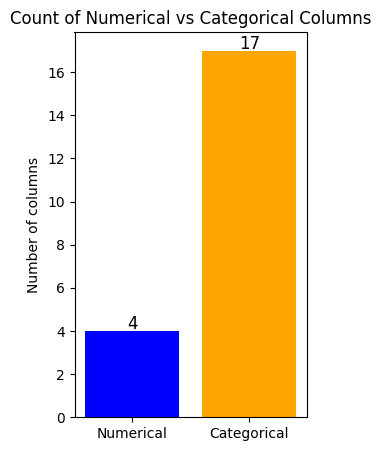

In [15]:
plt.figure(figsize=(3,5))
bars = plt.bar(labels,counts,color=('blue','orange'))

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', fontsize=12)

plt.title('Count of Numerical vs Categorical Columns')
plt.ylabel('Number of columns')
plt.show()

# **Count of Categorical Column**

In [16]:
for i in df.columns:
  if df[i].dtypes == 'object':
    print(i)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


# **Count of Numerical Column**

In [17]:
for i in df.columns:
  if df[i].dtypes == 'int64':
    print(i)

SeniorCitizen
tenure


In [18]:
for i in df.columns:
  if df[i].dtypes == 'float64':
    print(i)

MonthlyCharges
TotalCharges


# **Count of Null Values**

In [19]:
missing_values = df.isnull().sum()
missing_values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Visualization

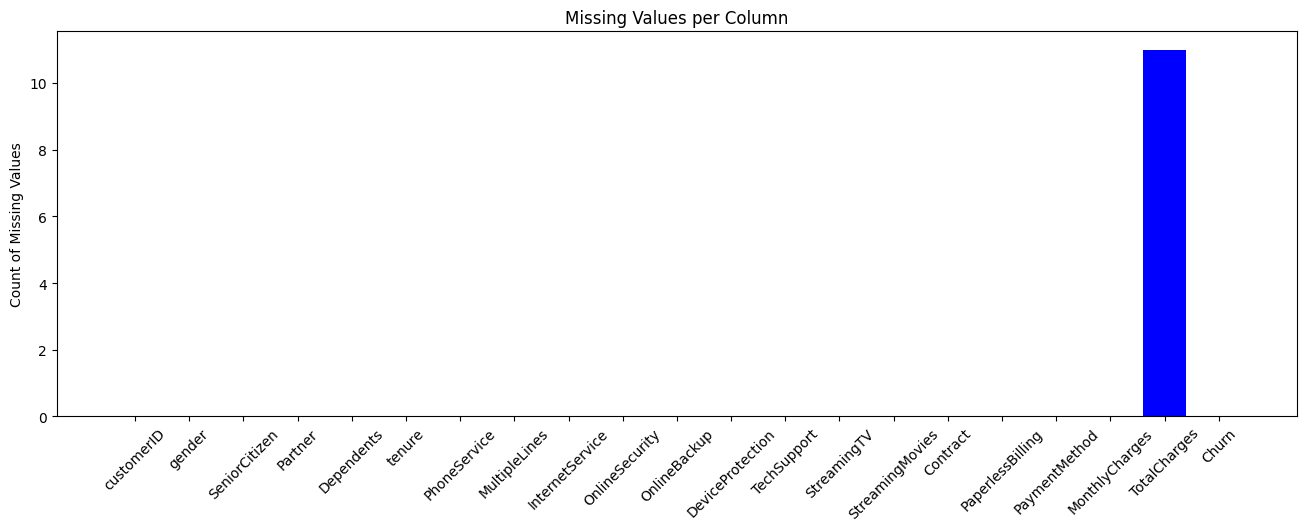

In [20]:
plt.figure(figsize=(16,5))
bars = plt.bar(missing_values.index, missing_values.values, color='blue')
plt.title('Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

# **ValueCounts for each Columns**

In [21]:
for i in df.columns[1:]:  # start from 2nd column onwards
    if df[i].dtype == 'object':
        counts = df[i].value_counts()
        print(f'column name is {i} and the count is {counts.to_dict()}')
        print('-'*300)

column name is gender and the count is {'Male': 3555, 'Female': 3488}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
column name is Partner and the count is {'No': 3641, 'Yes': 3402}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
column name is Dependents and the count is {'No': 4933, 'Yes': 2110}
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Visualization Based on above data**

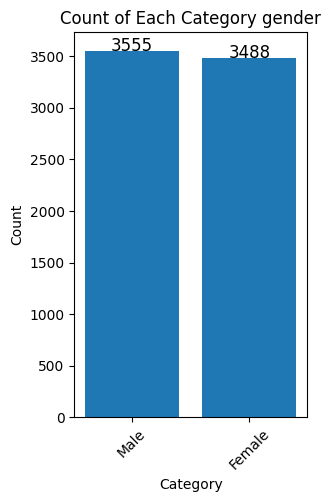

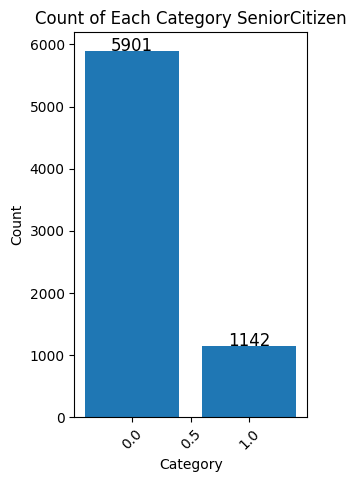

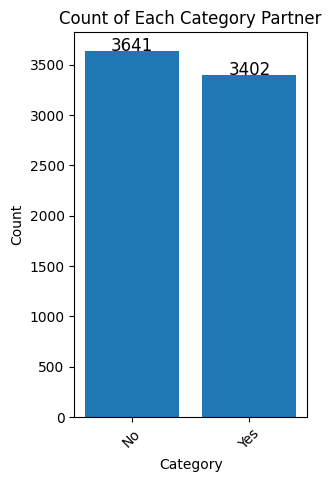

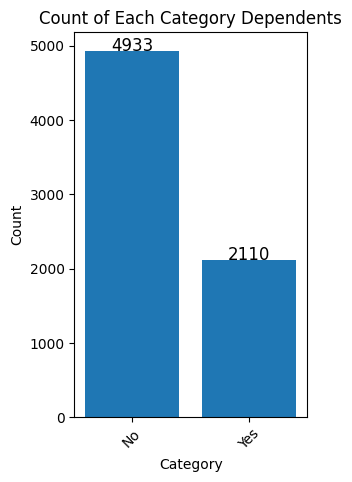

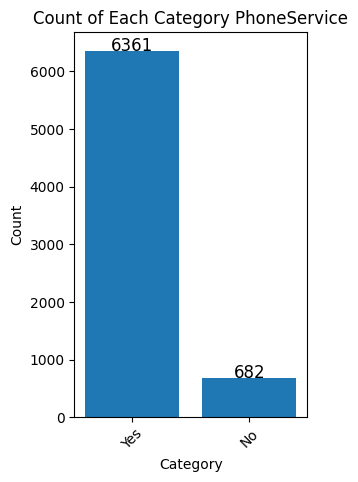

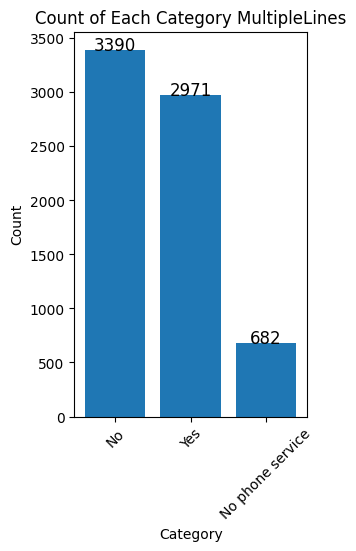

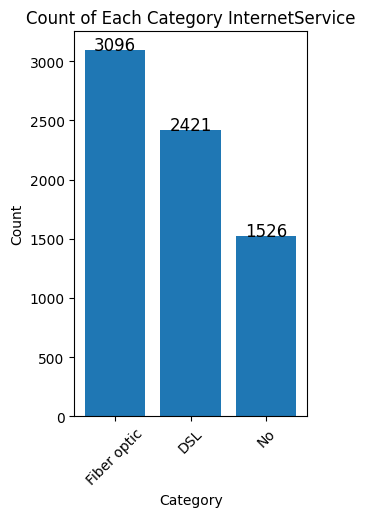

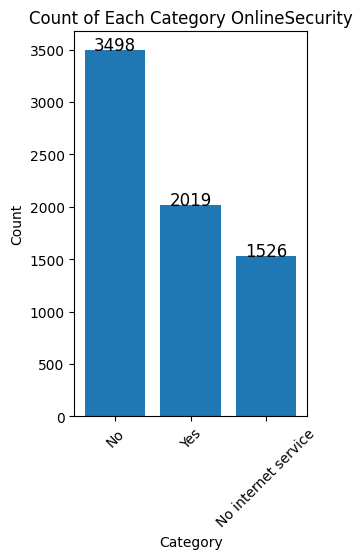

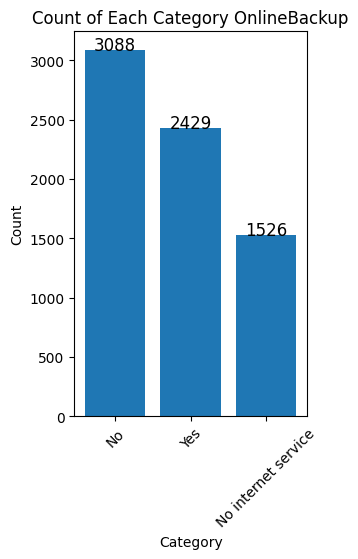

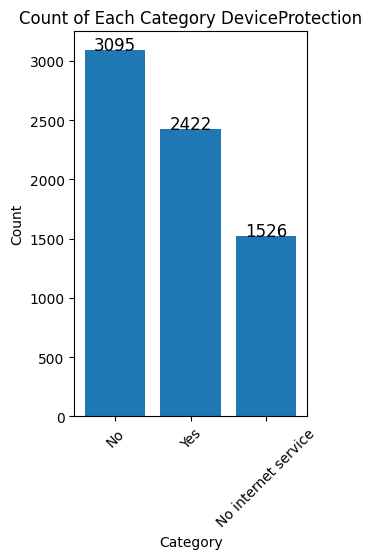

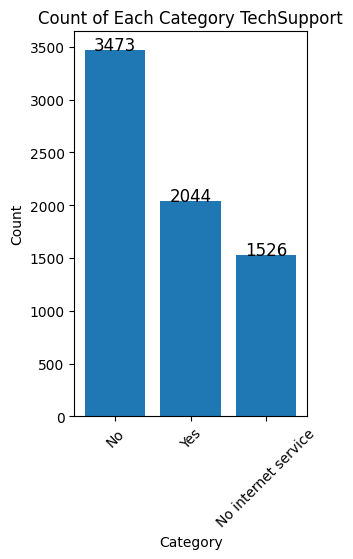

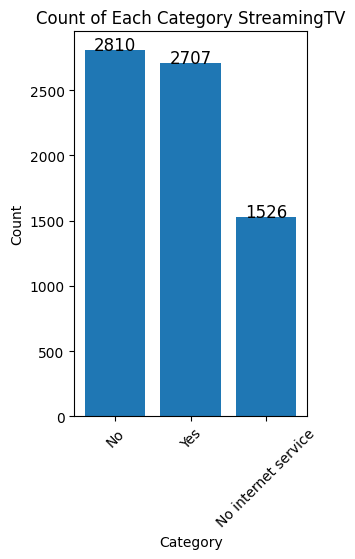

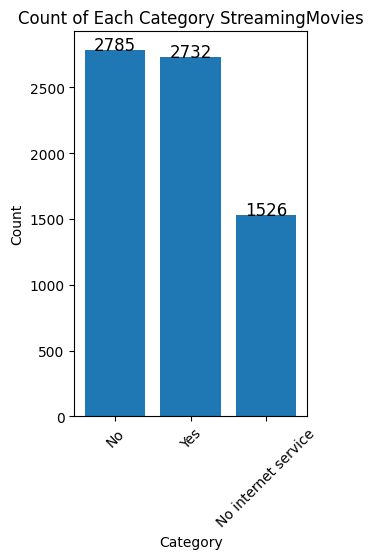

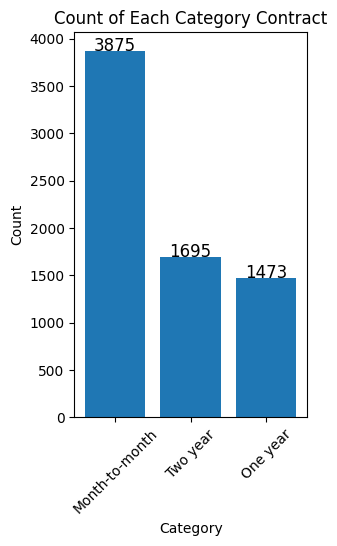

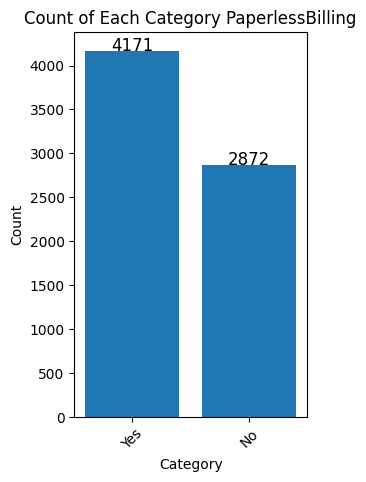

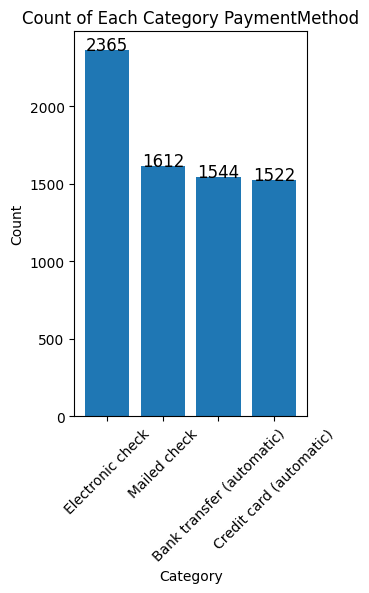

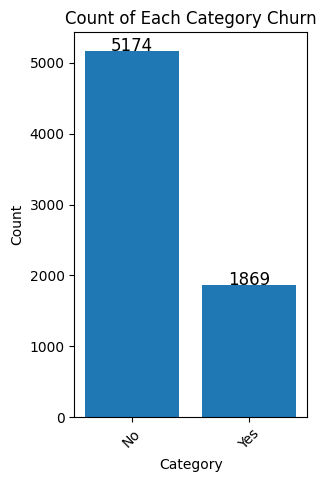

In [22]:
def all_values(col):
  counts = df[col].value_counts()
  plt.figure(figsize=(3,5))
  bars = plt.bar(counts.index, counts.values)
  for bar in bars:
      plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', fontsize=12)

  plt.title(f'Count of Each Category {col}')
  plt.xlabel('Category')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()
all_values('gender')
all_values('SeniorCitizen')
all_values('Partner')
all_values('Dependents')
all_values('PhoneService')
all_values('MultipleLines')
all_values('InternetService')
all_values('OnlineSecurity')
all_values('OnlineBackup')
all_values('DeviceProtection')
all_values('TechSupport')
all_values('StreamingTV')
all_values('StreamingMovies')
all_values('Contract')
all_values('PaperlessBilling')
all_values('PaymentMethod')
all_values('Churn')

# **Statistic and Description about All Columns**

In [23]:
for col in df.columns[1:]:
  print(f'column Name : {col} and Descriptive Statistics: {df[col].describe()}')
  print('-'*100)

column Name : gender and Descriptive Statistics: count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
----------------------------------------------------------------------------------------------------
column Name : SeniorCitizen and Descriptive Statistics: count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
----------------------------------------------------------------------------------------------------
column Name : Partner and Descriptive Statistics: count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
----------------------------------------------------------------------------------------------------
column Name : Dependents and Descriptive Statistics: count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
----------------

# **Visualizations based on Column performance for Churn**

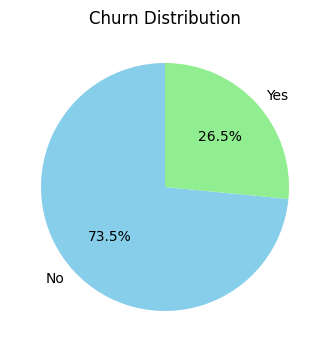

In [24]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(4,5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue','lightgreen'], startangle=90)
plt.title('Churn Distribution')
plt.show()

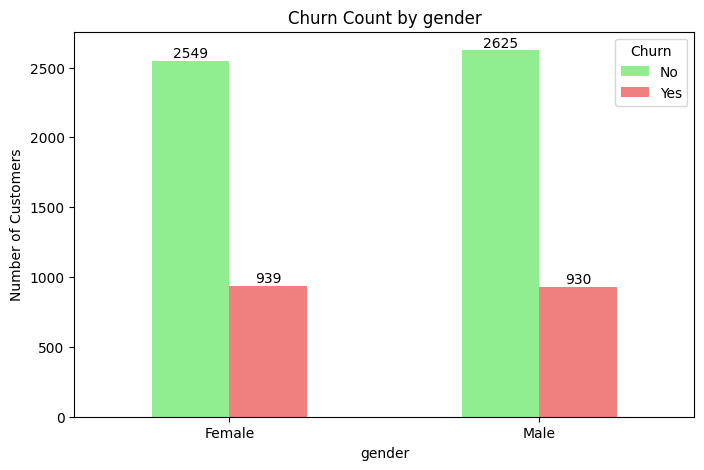

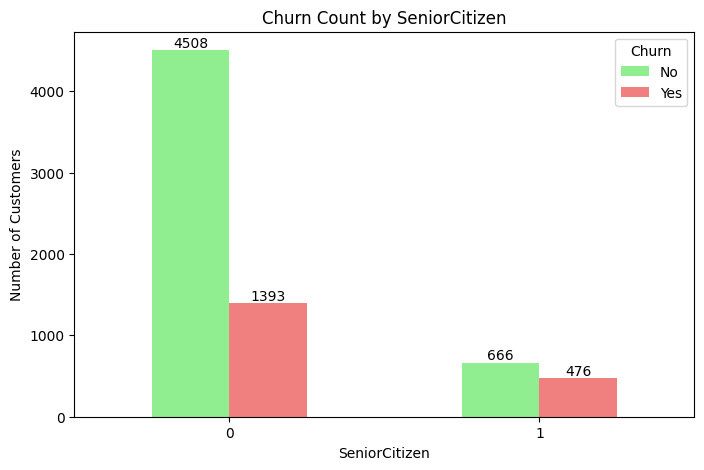

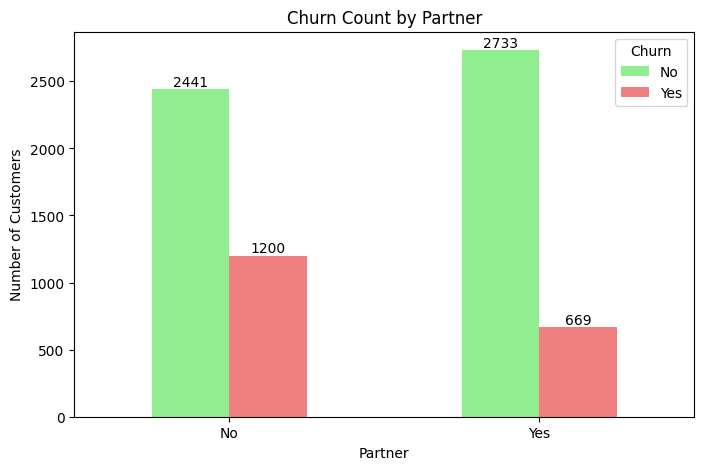

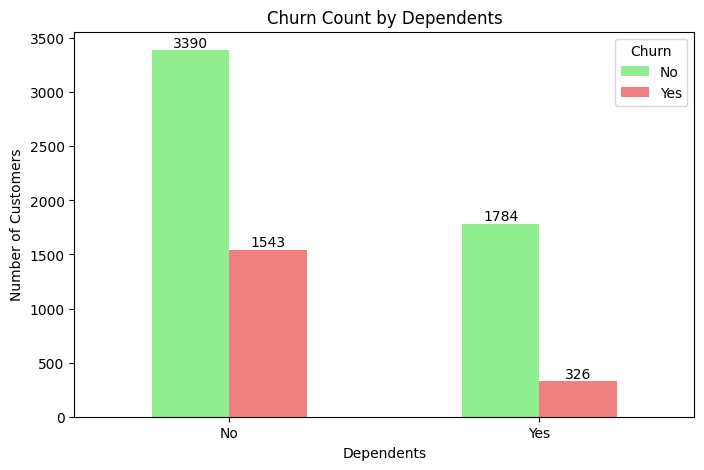

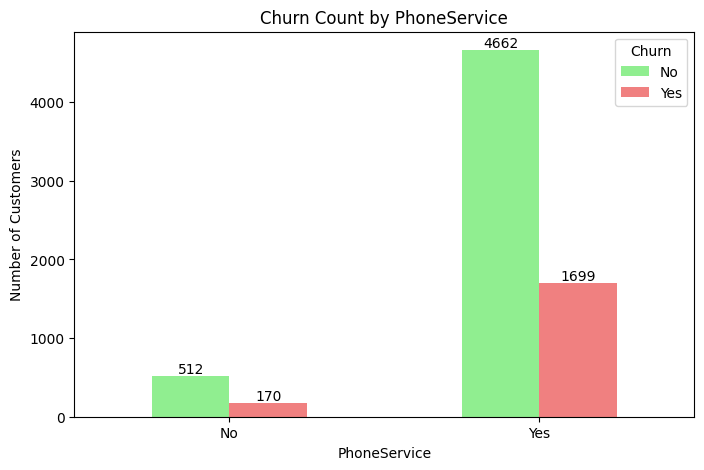

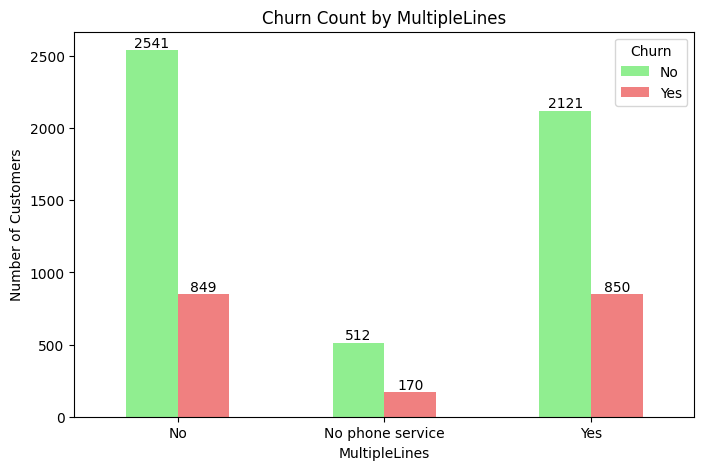

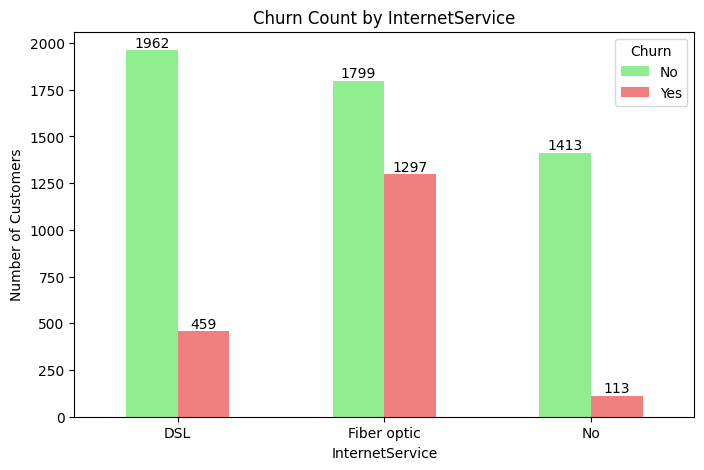

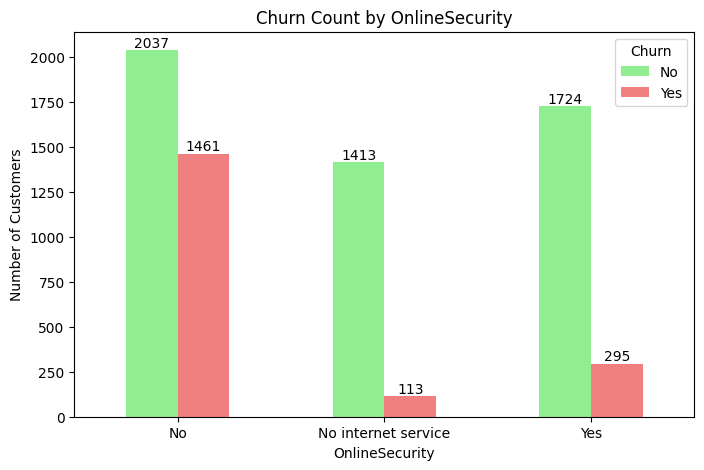

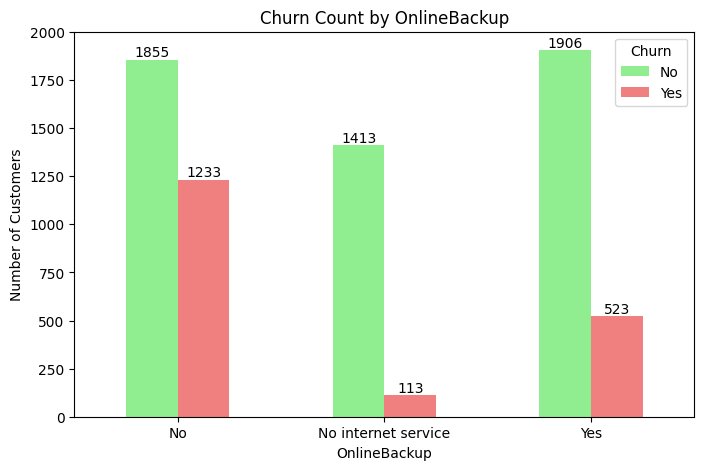

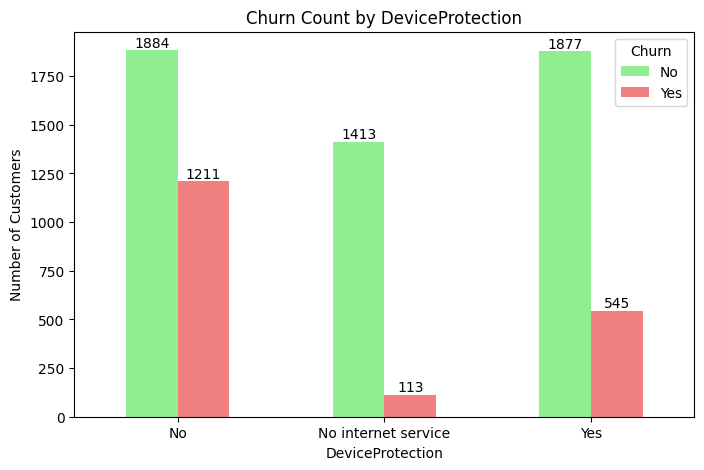

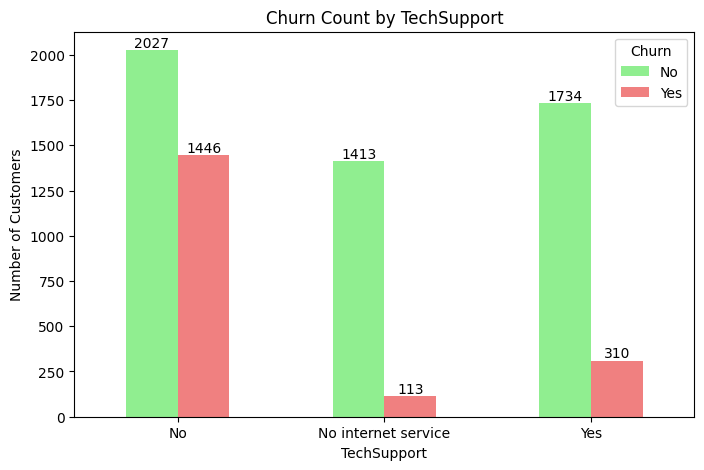

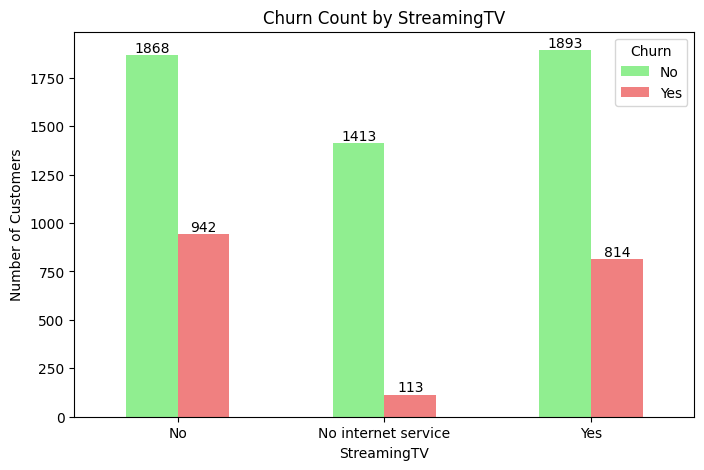

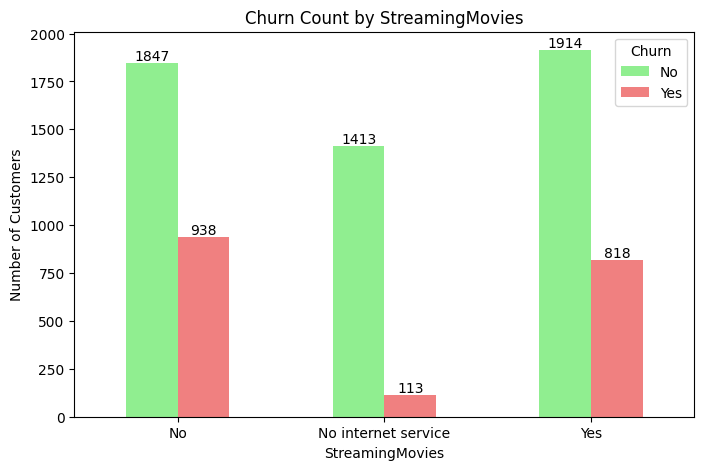

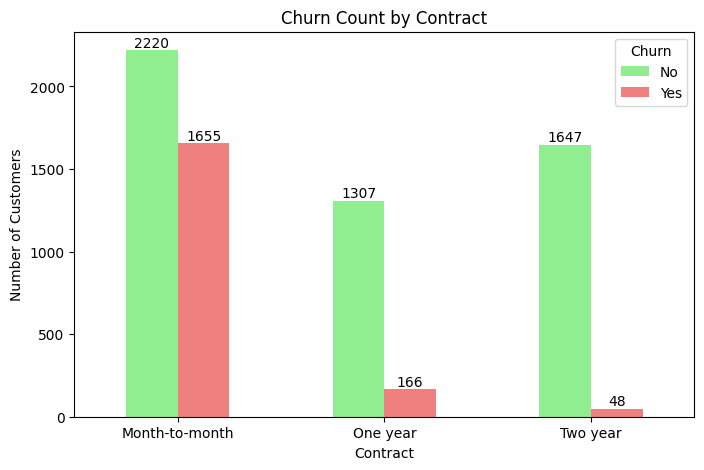

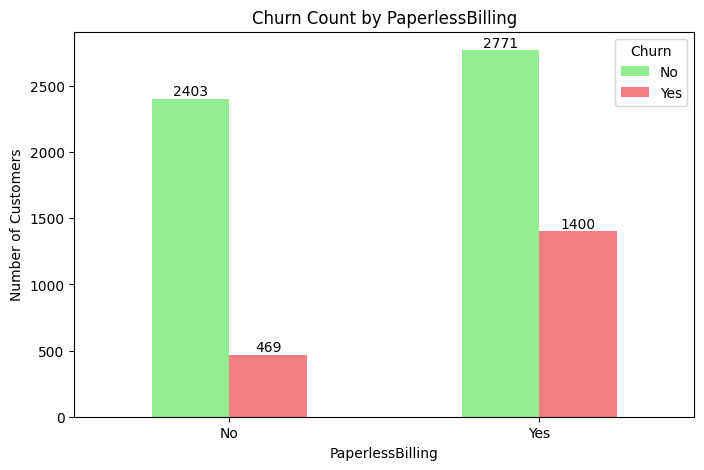

In [25]:
def plot(df, all_col, churn_col):
    churn_gender = df.groupby([all_col, churn_col]).size().unstack()

    ax = churn_gender.plot(kind='bar', figsize=(8,5), color=['lightgreen','lightcoral'])
    plt.title(f'Churn Count by {all_col}')
    plt.xlabel(all_col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=0)
    plt.legend(title='Churn')

    for p in ax.patches:
        ax.annotate(str(int(p.get_height())),
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    plt.show()

plot(df, 'gender', 'Churn')
plot(df, 'SeniorCitizen', 'Churn')
plot(df, 'Partner', 'Churn')
plot(df, 'Dependents', 'Churn')
plot(df, 'PhoneService', 'Churn')
plot(df, 'MultipleLines', 'Churn')
plot(df, 'InternetService', 'Churn')
plot(df, 'OnlineSecurity', 'Churn')
plot(df, 'OnlineBackup', 'Churn')
plot(df, 'DeviceProtection', 'Churn')
plot(df, 'TechSupport', 'Churn')
plot(df, 'StreamingTV', 'Churn')
plot(df, 'StreamingMovies', 'Churn')
plot(df, 'Contract', 'Churn')
plot(df, 'PaperlessBilling', 'Churn')


In [26]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


/tmp/ipython-input-2991244054.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['gender']=='Male']['TotalCharges'].dropna(),


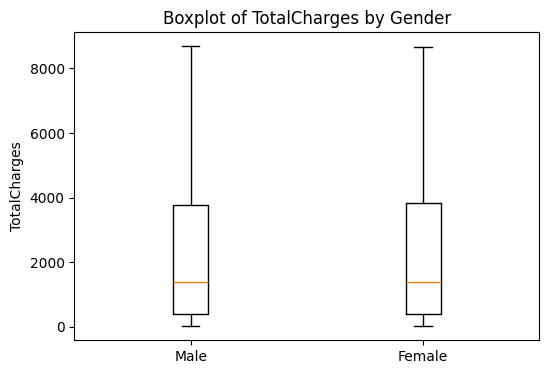

In [27]:
plt.figure(figsize=(6,4))
plt.boxplot([df[df['gender']=='Male']['TotalCharges'].dropna(),
             df[df['gender']=='Female']['TotalCharges'].dropna()],
            labels=['Male', 'Female'])

plt.title('Boxplot of TotalCharges by Gender')
plt.ylabel('TotalCharges')
plt.show()

In [28]:
for gender in df['gender'].unique():
    data = df[df['gender']==gender]['TotalCharges'].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
    print(f"Number of outliers for {gender}: {len(outliers)}")

Number of outliers for Female: 0
Number of outliers for Male: 0


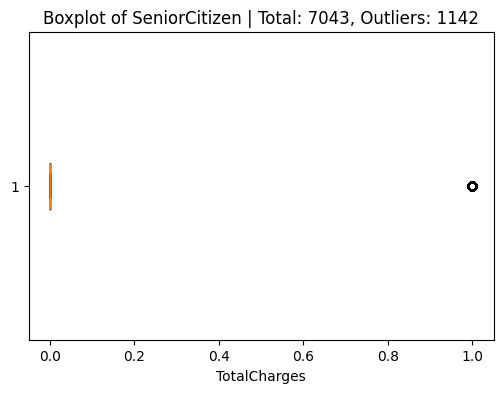

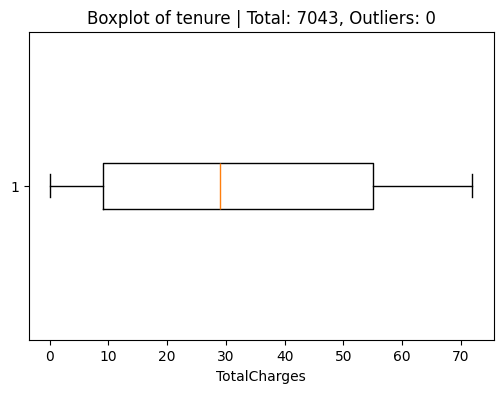

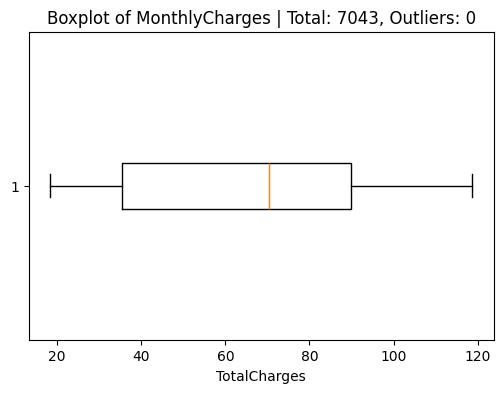

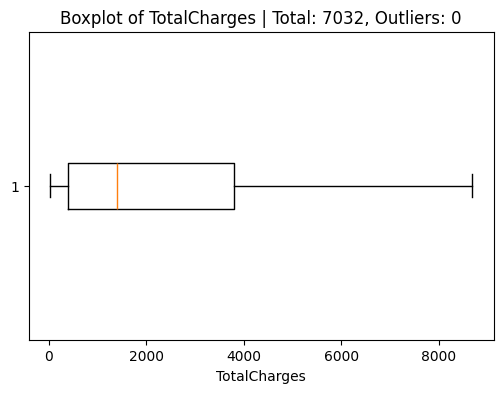

In [29]:
def fig(col):
  data = df[col].dropna()
  total_count = len(data)
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
  outlier_count = len(outliers)
  plt.figure(figsize=(6,4))
  plt.boxplot(df[col].dropna(), vert=False)
  plt.title(f'Boxplot of {col} | Total: {total_count}, Outliers: {outlier_count}')
  plt.xlabel('TotalCharges')
  plt.show()
fig('SeniorCitizen')
fig('tenure')
fig('MonthlyCharges')
fig('TotalCharges')

In [30]:
data = df['SeniorCitizen'].dropna()

# Calculate IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Count outliers
outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
print("Number of outliers:", len(outliers))

Number of outliers: 1142
